In [1]:
import pandas as pd
import os
from collections import defaultdict

In [2]:
temp = pd.read_csv("./Brain-Tumor-Progression.csv")
temp

,Unnamed: 0,Modality,SeriesInstanceUID,ImageCount,BodyPartExamined,SeriesDescription,TotalSizeInBytes
0,0,MR,1.3.6.1.4.1.14519.5.2.1.4429.7055.418756081736...,22,BRAIN,T1post,3006554
1,1,MR,1.3.6.1.4.1.14519.5.2.1.4429.7055.285581607999...,22,BRAIN,T1post,11652196
2,2,MR,1.3.6.1.4.1.14519.5.2.1.4429.7055.189956832840...,24,BRAIN,T1post,12721624
3,3,MR,1.3.6.1.4.1.14519.5.2.1.4429.7055.134397589783...,22,BRAIN,T1post,4023752
4,4,MR,1.3.6.1.4.1.14519.5.2.1.4429.7055.250698293053...,22,BRAIN,T1post,4029584
...,...,...,...,...,...,...,...
378,378,MR,1.3.6.1.4.1.14519.5.2.1.4429.7055.309564124199...,22,BRAIN,Mask_Tumor,11586424
379,379,MR,1.3.6.1.4.1.14519.5.2.1.4429.7055.211945768737...,22,BRAIN,Mask_Tumor,11586052
380,380,MR,1.3.6.1.4.1.14519.5.2.1.4429.7055.105885821998...,22,BRAIN,Mask_Tumor,11586076
381,381,MR,1.3.6.1.4.1.14519.5.2.1.4429.7055.252773638102...,24,BRAIN,Mask_Tumor,12639690


In [3]:
# How many modalities are there in the TCIA data?
modality_dict = defaultdict(int)
for csv in os.listdir("."):
    if ".csv" not in csv:
        continue

    data = pd.read_csv(csv)
    for modality in data["Modality"]:
        modality_dict[modality] += 1
        
print([modality for modality in modality_dict])
print(f"Number of options in modality column: {len(modality_dict)}")

['MR', 'CT', 'PT', 'SR', 'CTPT', 'OT', 'RTDOSE', 'RTSTRUCT', 'RTPLAN', 'SEG', 'CR', 'FUSION', 'DX', 'SC', 'RWV', 'KO', 'MG', 'NM', 'REG', 'XA', 'US', 'PR']
Number of options in modality column: 22


In [4]:
"""
Meaning of each of these modalities from https://wiki.cancerimagingarchive.net/display/Public/DICOM+Modality+Abbreviations.

MR: MRI Scan
CT: Computed Tomography
PT: PET, Positron Emission tomography
SR: SR Document, some kind of metadata,NOT AN IMAGE
CTPT: presumably combination CT and PET
OT: Other, might be in series description
RTDOSE: Radiotheraphy dose, NOT AN IMAGE
RTSTRUCT: Contour structure, NOT AN IMAGE
RTPLAN: radiotherapy plan, NOT AN IMAGE
SEG: Segmentation mask, NOT AN IMAGE
CR: Computed radiography, digital x-ray
FUSION: Presumably combination of modalities, will probably ignore
DX: Digital radiography, also digital x-ray but different kind
SC: Not included 
RWV: Not included
KO: Metadata pointing to important slices in 3d scans, NOT AN IMAGE
MG: Mammography, low energy x-ray do we treat as CR/DX?
NM: Nuclear medicine, PET is a subset of NM which is a bit odd.
REG: Unclear, NOT AN IMAGE
XA: X-ray angiography, kind of x-ray but looks different to other ones
US: Ultrasound
PR: contains metadata about other images, NOT AN IMAGE
"""

"""
We need to:
    Find out what SC and RWV are.
    Look into other.
    Look into fusion.

"""

"""
So final image types are:
MR, CT, PT, CR, DX, NM, XA, US, MG.
That makes our columns:
MRCount, MRSizeInMB, PTCount, PTSizeInMB, CRCount, CRSizeInMB, DXCount, DXSizeInMB, XACount, XASizeInMB, USCount, USCountInMB 
"""

'\nSo final image types are:\nMR, CT, PT, CR, DX, NM, XA, US, MG.\nThat makes our columns:\nMRCount, MRSizeInMB, PTCount, PTSizeInMB, CRCount, CRSizeInMB, DXCount, DXSizeInMB, XACount, XASizeInMB, USCount, USCountInMB \n'

In [5]:
# Lets find out how many images there are for each modality.

metadata_dict = {
    "Collection": [],
    "CollectionSize(B)": [],
    "MRCount": [],
    "CTCount" : [],
    "PTCount" : [],
    "CRCount" : [],
    "DXCount" : [],
    "NMCount" : [],
    "XACount" : [],
    "USCount" : [],
    "MGCount": []
}
modalities = ["MR", "CT", "PT", "CR", "DX", "NM", "XA", "US", "MG"]
for csv in os.listdir("."):
    if ".csv" not in csv:
        continue
    
    mr_count = 0
    ct_count = 0
    pt_count = 0
    cr_count = 0
    dx_count = 0
    nm_count = 0
    xa_count = 0
    us_count = 0
    mg_count = 0

    data = pd.read_csv(csv)
    series_size_col = list(data["TotalSizeInBytes"])
    dataset_size = 0

    for i in range(0, len(data)):
        modality_present = [modality in data["Modality"][i] for modality in modalities]
        if any(modality_present):
            dataset_size += data["TotalSizeInBytes"][i]
    
    for i in range(0, len(data)):
        modality = data["Modality"][i]
        if "MR" in modality:
            mr_count += data["ImageCount"][i]
        elif "CT" in modality:
            ct_count += data["ImageCount"][i]
        elif  "PT" in modality:
            pt_count += data["ImageCount"][i]
        elif  "CR" in modality:
            cr_count += data["ImageCount"][i]
        elif  "DX" in modality:
            dx_count += data["ImageCount"][i]
        elif  "NM" in modality:
            nm_count += data["ImageCount"][i]
        elif  "XA" in modality:
            xa_count += data["ImageCount"][i]
        elif  "US" in modality:
            us_count += data["ImageCount"][i]
        elif "MG" in modality:
            mg_count += data["ImageCount"][i]
        else:
            pass
    collection = csv[:-4]    # trim the .csv off
    metadata_dict["Collection"].append(collection)
    metadata_dict["CollectionSize(B)"].append(dataset_size)
    metadata_dict["MRCount"].append(mr_count)
    metadata_dict["CTCount"].append(ct_count)
    metadata_dict["PTCount"].append(pt_count)
    metadata_dict["CRCount"].append(cr_count)
    metadata_dict["DXCount"].append(dx_count)
    metadata_dict["NMCount"].append(nm_count)
    metadata_dict["XACount"].append(xa_count)
    metadata_dict["USCount"].append(us_count)
    metadata_dict["MGCount"].append(mg_count)
    
metadata_df = pd.DataFrame(data=metadata_dict)
metadata_df.to_csv("./processed/processed_collection_data.csv", index=False)
print(metadata_df[:5])

                     Collection  CollectionSize(B)  MRCount  CTCount  PTCount  \
0                     CPTAC-SAR        15196915718     4621    22450     2524   
1  Prostate Fused-MRI-Pathology         4743508634    32508        0        0   
2              LungCT-Diagnosis         2469159104        0     4682        0   
3          RIDER PHANTOM PET-CT          722874316        0     1291      940   
4            ACRIN-DSC-MR-Brain        86886455912   717000       70        0   

   CRCount  DXCount  NMCount  XACount  USCount  MGCount  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  


In [6]:
# OK, now lets get an overview of all the data we have access to. 
size_col = metadata_df["CollectionSize(B)"]
total_tcia_size = sum(size_col)
total_tcia_size_GB = total_tcia_size // 1000 // 1000 // 1000

print(f"Total amount of data we have access to is {total_tcia_size_GB}GB")

Total amount of data we have access to is 6856GB


In [7]:
# Lets see how many of each image type there is.

for column in metadata_df:
    if "Count" in column:
        print(column, sum(metadata_df[column]))


MRCount 5666745
CTCount 16636416
PTCount 1783027
CRCount 235
DXCount 848
NMCount 71
XACount 10
USCount 4949
MGCount 228250


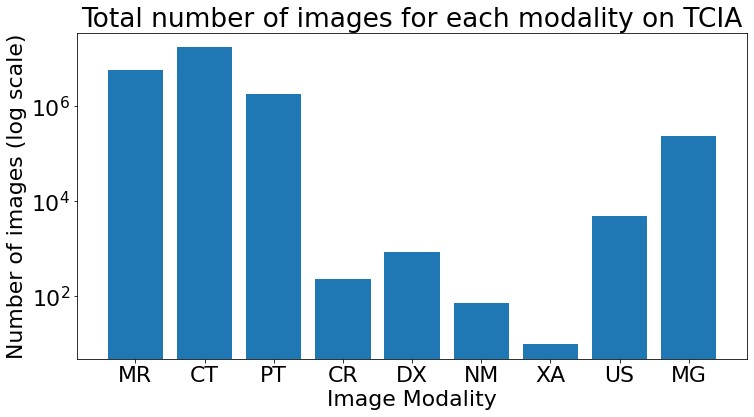

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":22})

x = [col[:2] for col in metadata_df if "Count" in col]
x_pos = [i for i, _ in enumerate(x)]
values = [sum(metadata_df[column]) for column in metadata_df if "Count" in column]
plt.rcParams.update()
fig, ax = plt.subplots(figsize=(12, 6))

plt.bar(x_pos, values)
plt.xticks(x_pos, x)
plt.yscale("log")
plt.title("Total number of images for each modality on TCIA")
plt.ylabel("Number of images (log scale)")
plt.xlabel("Image Modality")
plt.savefig("./processed/images-per-modality-log-scale.png")

In [9]:
"""
From the above graph we can see there are an irrelevant number of XA's 
and NM's and also NM is too broad a term to be useful.

Final modalities are:
["MR", "CT", "PT", "CR", "DX", "US", "MG"]
"""
modalities = ["MR", "CT", "PT", "CR", "DX", "US", "MG"]


[Text(0, 0, 'MRCount'),
 Text(1, 0, 'CTCount'),
 Text(2, 0, 'PTCount'),
 Text(3, 0, 'CRCount'),
 Text(4, 0, 'DXCount'),
 Text(5, 0, 'NMCount'),
 Text(6, 0, 'XACount'),
 Text(7, 0, 'USCount'),
 Text(8, 0, 'MGCount')]

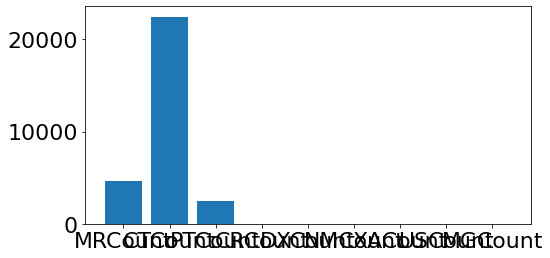

In [10]:

fig, ax = plt.subplots(figsize=(8,4))

x = [col for col in metadata_df if "Count" in col]
x_pos = range(0, len(x))
y = [metadata_df[col][0] for col in x]

ax.bar(x_pos, y)
ax.set_xticks(x_pos)
ax.set_xticklabels(x)

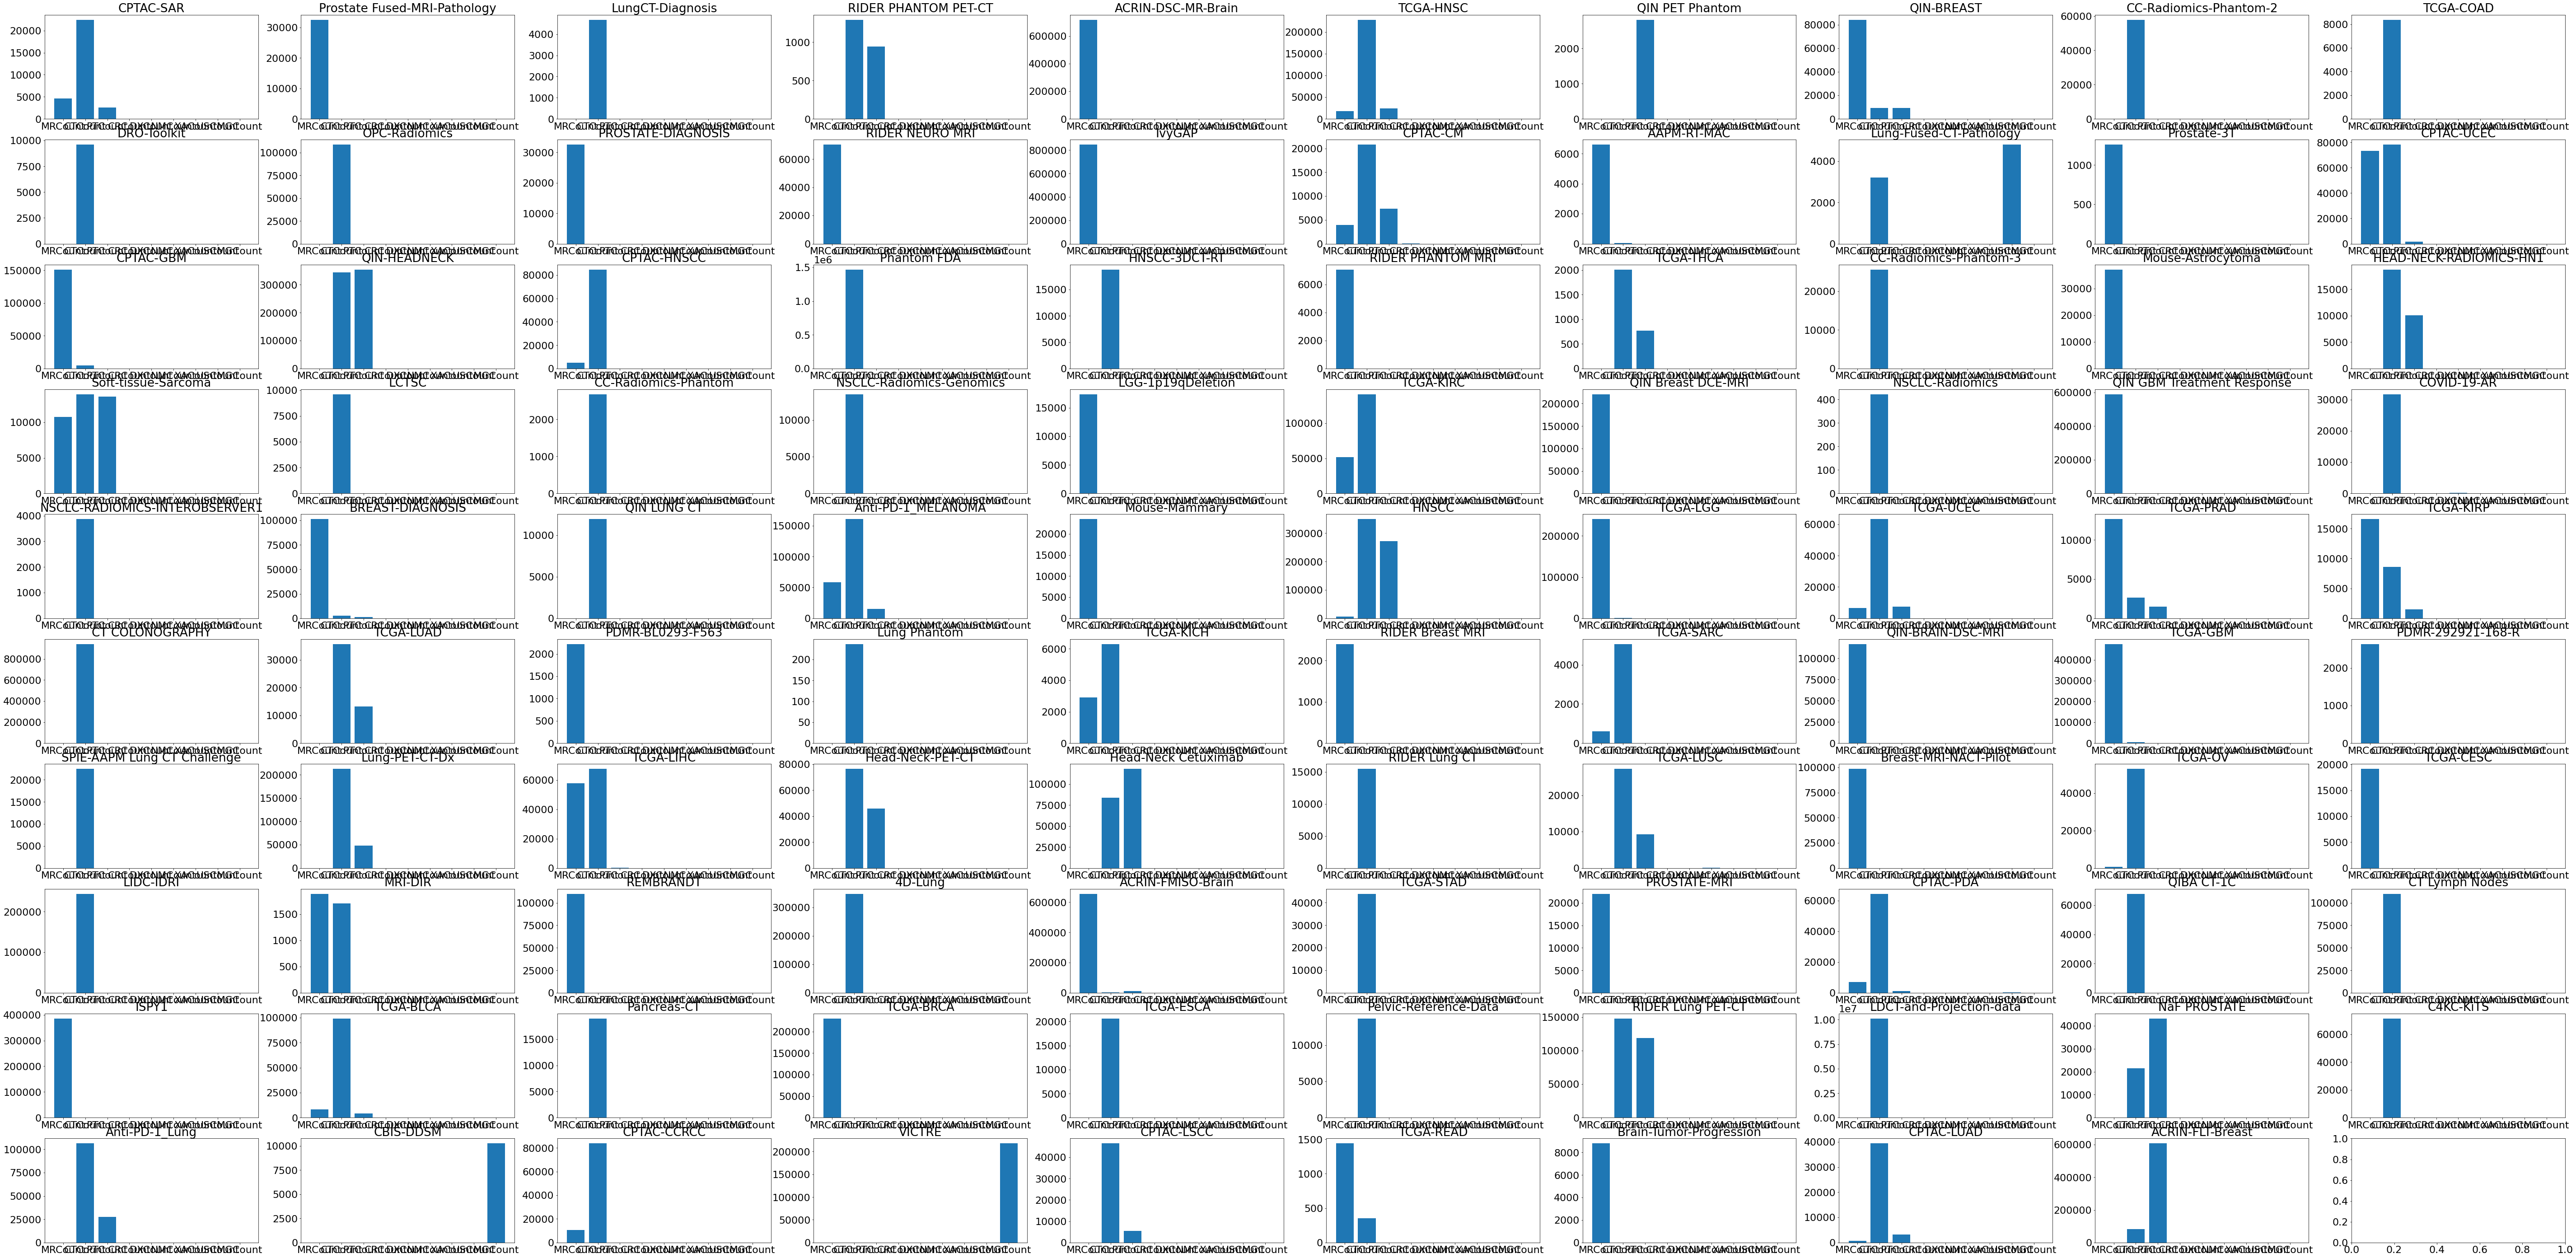

In [11]:
# Plot the number of images for each modality for each dataset.
fig, ax = plt.subplots(10, 10, figsize=(100,50))
fig.set_facecolor("white")
row = 0
col = 0
for i in range(0, len(metadata_df)):
    y = [metadata_df[col][i] for col in x]
    ax[i // 10, i - (i // 10)*10].bar(x_pos, y)
    ax[i // 10, i - (i // 10)*10].set_xticks(x_pos)
    ax[i // 10, i - (i // 10)*10].set_xticklabels(x)
    ax[i // 10, i - (i // 10)*10].set_title(metadata_df["Collection"][i])
plt.savefig("./processed/test.png", frameon=True)

In [12]:
metadata_df

,Collection,CollectionSize(B),MRCount,CTCount,PTCount,CRCount,DXCount,NMCount,XACount,USCount,MGCount
0,CPTAC-SAR,15196915718,4621,22450,2524,0,0,0,0,0,0
1,Prostate Fused-MRI-Pathology,4743508634,32508,0,0,0,0,0,0,0,0
2,LungCT-Diagnosis,2469159104,0,4682,0,0,0,0,0,0,0
3,RIDER PHANTOM PET-CT,722874316,0,1291,940,0,0,0,0,0,0
4,ACRIN-DSC-MR-Brain,86886455912,717000,70,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
94,CPTAC-LSCC,30943989804,0,46459,5560,22,4,27,0,0,0
95,TCGA-READ,423483788,1440,356,0,0,0,0,0,0,0
96,Brain-Tumor-Progression,3160483188,8798,0,0,0,0,0,0,0,0
97,CPTAC-LUAD,28919406240,758,39383,3192,50,10,27,0,0,0
